In [61]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

 ## Data Analysis Part 

In [33]:
train_data = pd.read_csv('train.csv')
train_data.pop('Id')
train_data.shape

(1460, 80)

In [34]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
test_data = pd.read_csv('test.csv')
test_data.shape

(1459, 80)

### Checking missing values and their effects on sale prices

In [36]:
#Get percentage of null values in respective columns
nan_features = []
for c in train_data.columns[:-1]:
    if train_data[c].isna().sum()>1:
        nan_features.append(c)
        print(c,train_data[c].isna().sum()/train_data.shape[0])

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


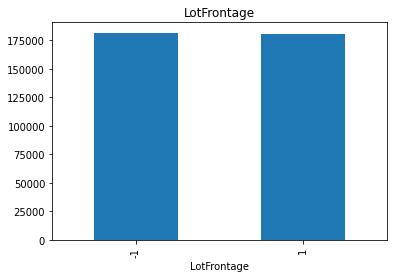

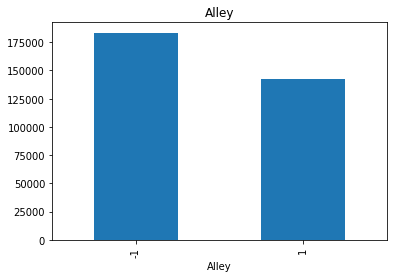

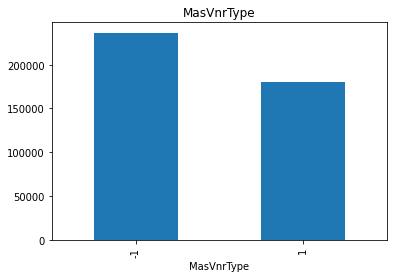

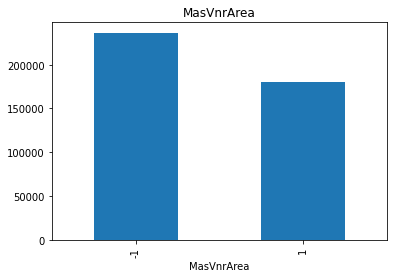

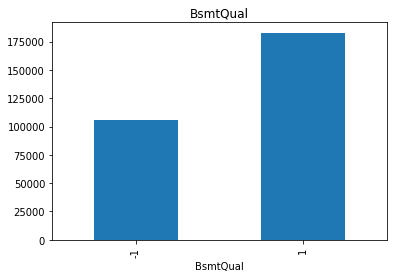

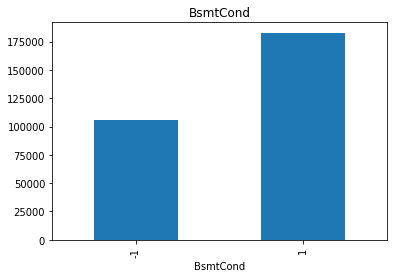

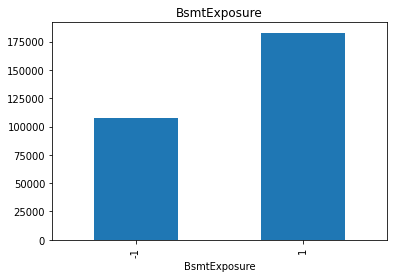

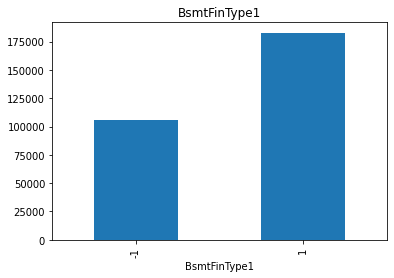

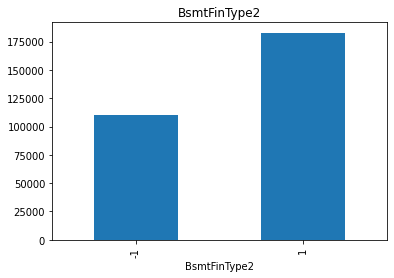

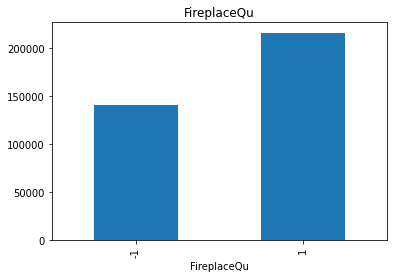

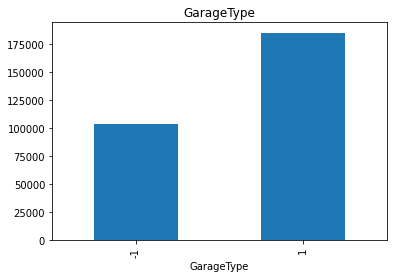

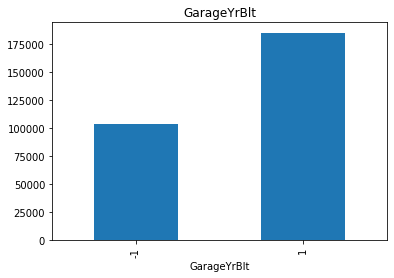

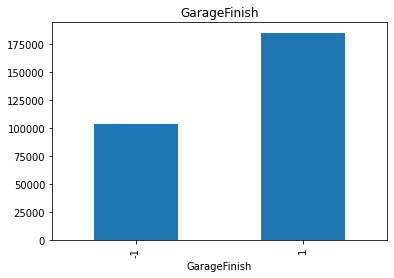

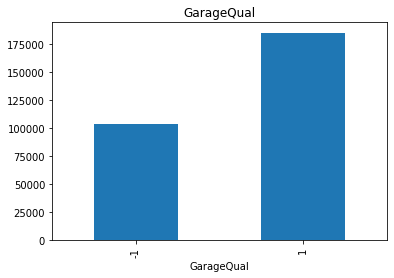

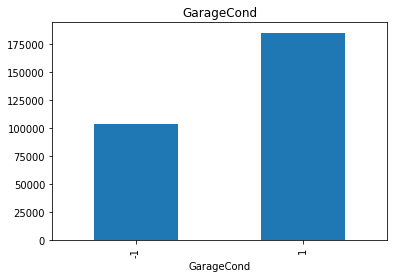

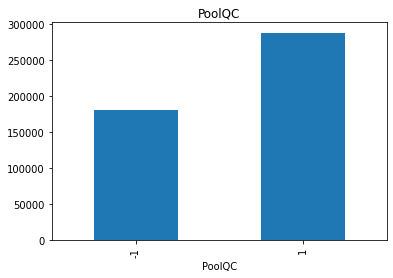

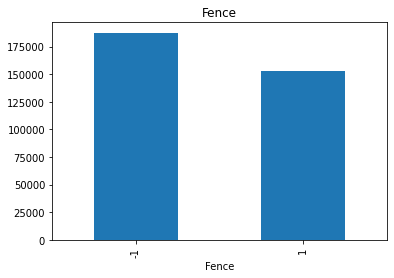

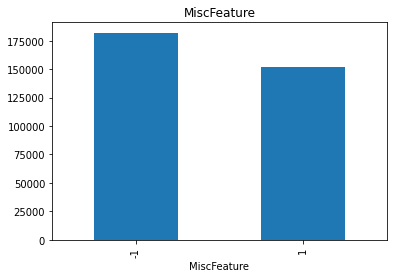

In [64]:
#Compare the samples having nan in the feature and others
for f in nan_features:
    foo = train_data.copy()
    foo[f] = np.where(foo[f].isnull(),-1,1)
    foo.groupby(f)['SalePrice'].mean().plot.bar()
    plt.title(f)
    plt.show()

### Numerical Variables

In [44]:
#From dataset description: MSSubClass is categorical and there are 4 year attributes
num_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'object' ]
train_data[num_features]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


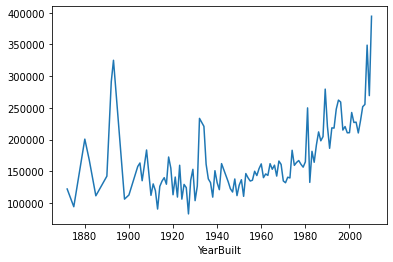

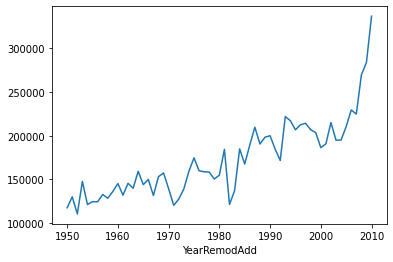

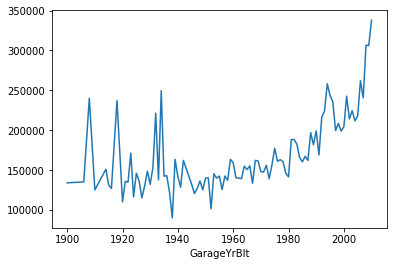

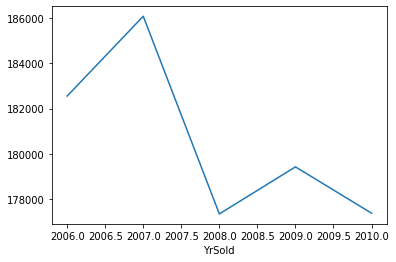

In [65]:
#Checking how year features effecting the sale prices
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in year_features:
    foo = train_data.groupby(i)['SalePrice'].mean().plot()
    plt.show()
#Year sold negatively correlated!!

In [59]:
#Analysing discrete variables except MSSubClass!
#Consireding variables having less than 30 unique value as discrete
discrete_features = [f for f in num_features if len(train_data[f].unique())<30 and f not in year_features]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

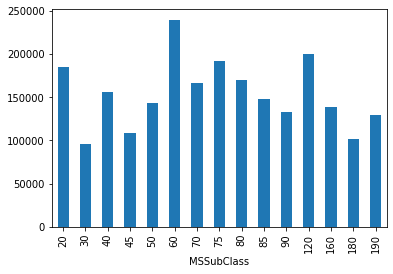

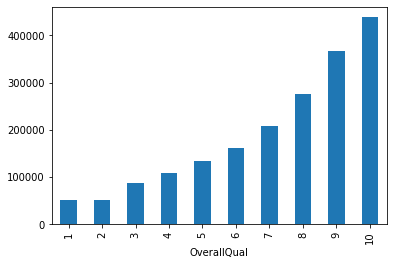

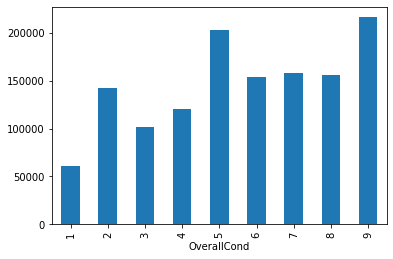

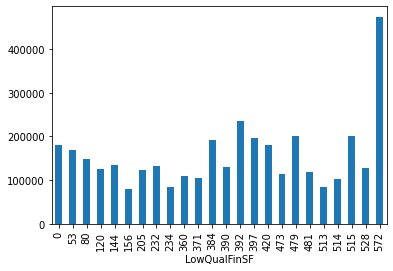

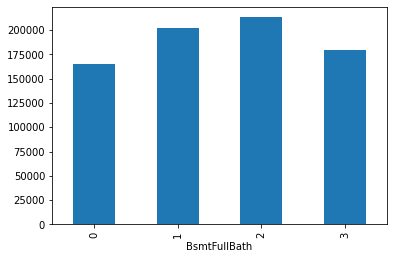

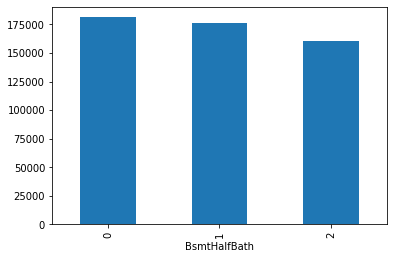

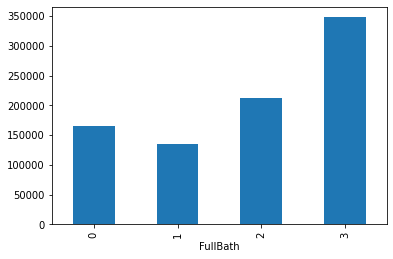

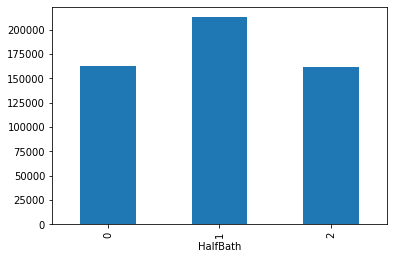

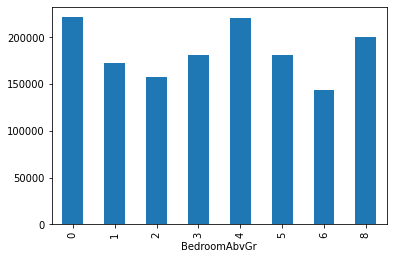

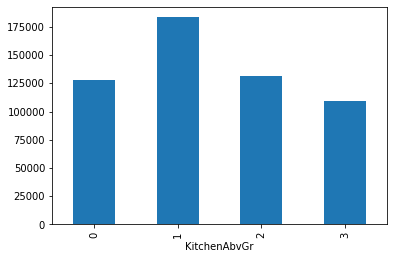

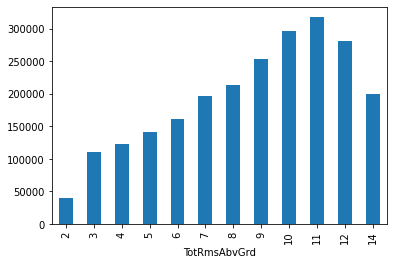

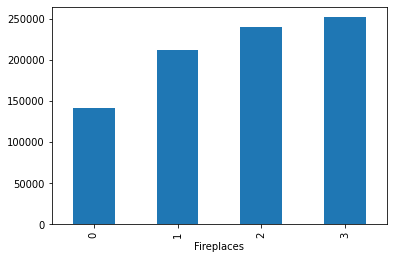

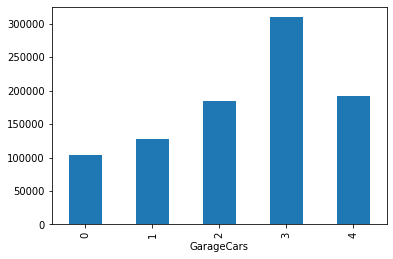

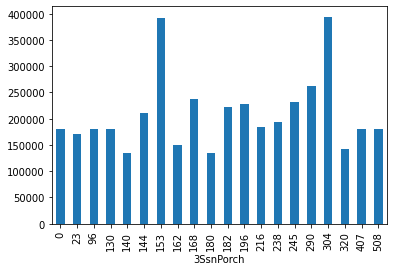

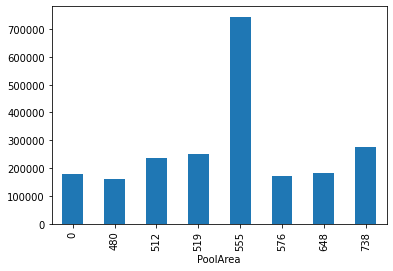

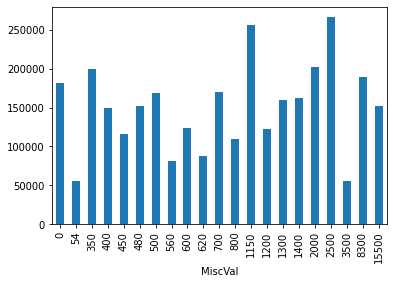

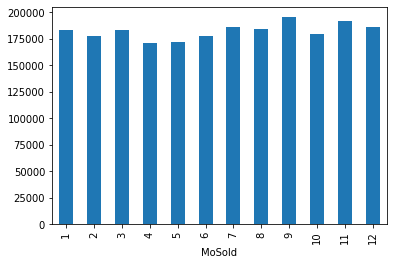

In [66]:
#Correlation between the discrete variables and sale prices
for i in discrete_features:
    foo = train_data.groupby(i)['SalePrice'].mean().plot.bar()
    plt.show()
#OverallQual, FullBath, TotRmsAbvGrd, Fireplaces showing considerable correlation

In [68]:
#Continuous variables
con_features = [f for f in num_features if f not in discrete_features and f not in year_features]
con_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

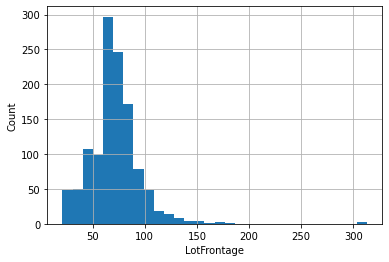

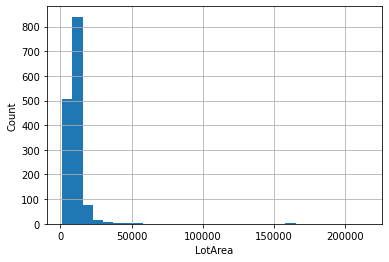

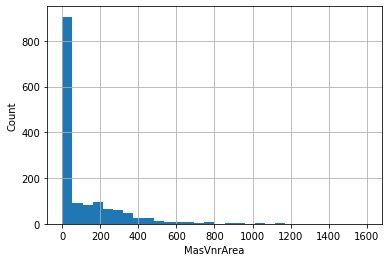

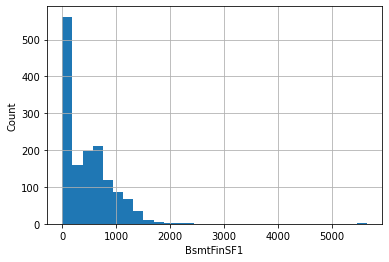

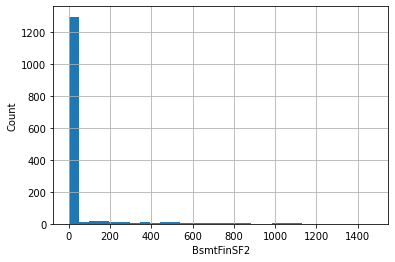

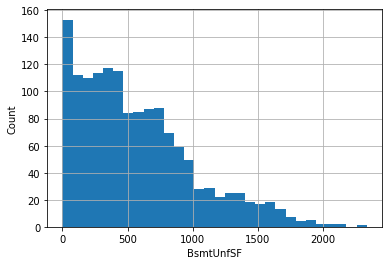

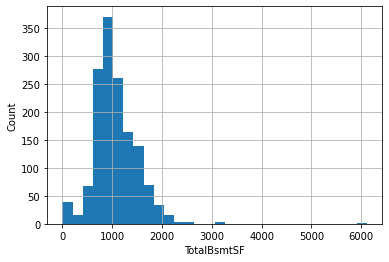

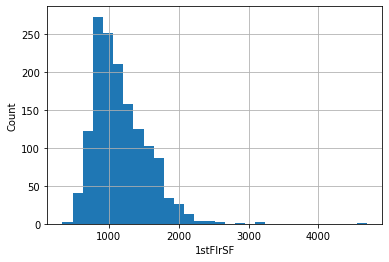

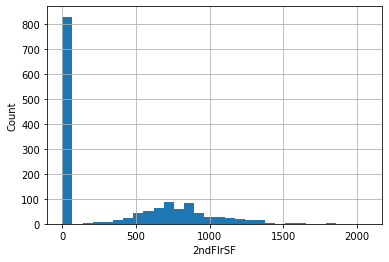

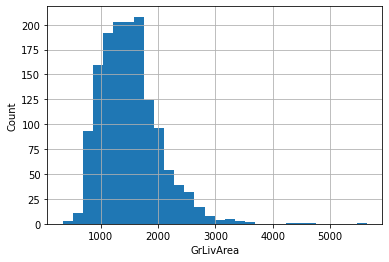

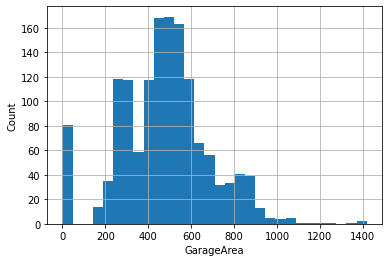

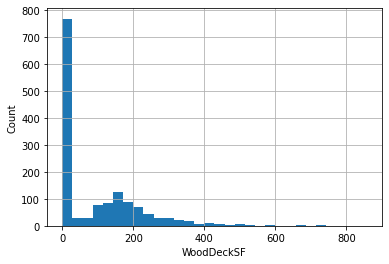

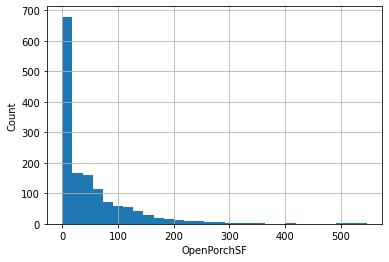

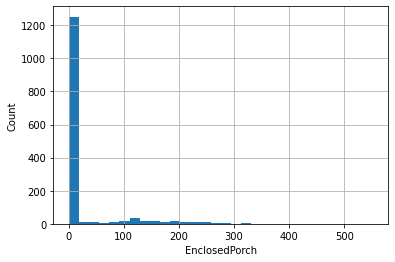

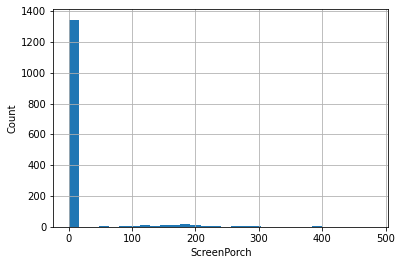

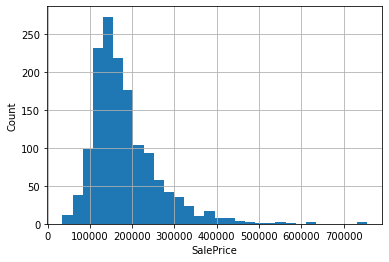

In [74]:
#Distribution of continuous variables
for i in con_features:
    train_data[i].hist(bins=30)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

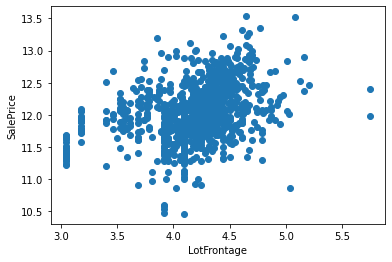

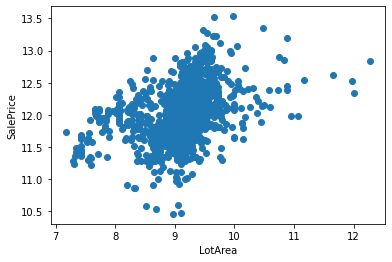

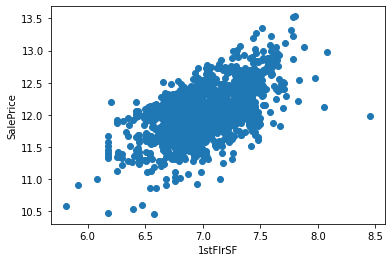

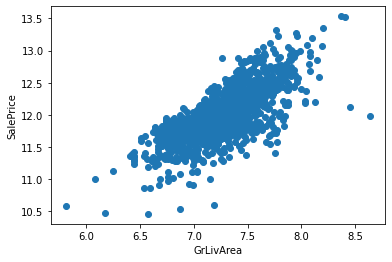

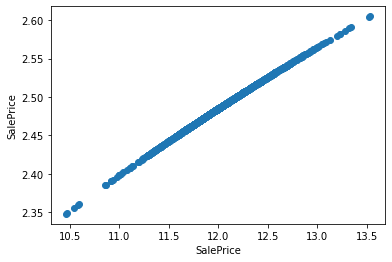

In [106]:
#Most of the data is right tailed so log transformation is a good choice
for i in con_features:
    foo = train_data.copy()
    #preventing log(0)
    if 0 in foo[i].unique():
        pass
    else:
        foo[i] = np.log(foo[i])
        #cant histogram here bc some nan values should be handled
        plt.scatter(foo[i],np.log(foo['SalePrice']))
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()
#Shows strong correlation in some variables

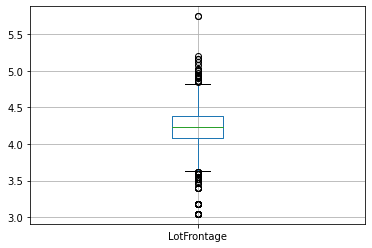

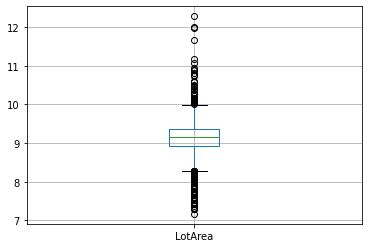

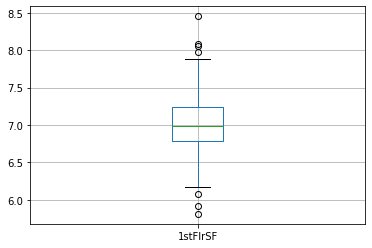

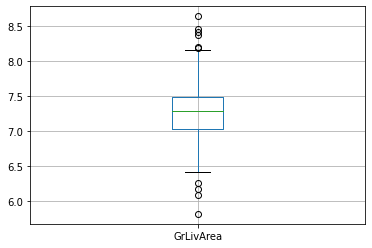

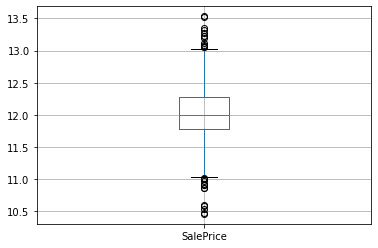

In [108]:
#Checking outliers
for i in con_features:
    foo = train_data.copy()
    #preventing log(0)
    if 0 in foo[i].unique():
        pass
    else:
        foo[i] = np.log(foo[i])
        foo.boxplot(column=i)
        plt.show()
#A lot of outliers!

### Categorical Features

In [117]:
cat_features = [f for f in train_data.columns if train_data[f].dtypes=='object']
#I should also add the MSSubClass since it is numeric but a categorical variable as stated in data description
cat_features = ['MSSubClass'] + cat_features
for i in cat_features:
    print(i,': ',len(train_data[i].unique()))

MSSubClass :  15
MSZoning :  5
Street :  2
Alley :  3
LotShape :  4
LandContour :  4
Utilities :  2
LotConfig :  5
LandSlope :  3
Neighborhood :  25
Condition1 :  9
Condition2 :  8
BldgType :  5
HouseStyle :  8
RoofStyle :  6
RoofMatl :  8
Exterior1st :  15
Exterior2nd :  16
MasVnrType :  5
ExterQual :  4
ExterCond :  5
Foundation :  6
BsmtQual :  5
BsmtCond :  5
BsmtExposure :  5
BsmtFinType1 :  7
BsmtFinType2 :  7
Heating :  6
HeatingQC :  5
CentralAir :  2
Electrical :  6
KitchenQual :  4
Functional :  7
FireplaceQu :  6
GarageType :  7
GarageFinish :  4
GarageQual :  6
GarageCond :  6
PavedDrive :  3
PoolQC :  4
Fence :  5
MiscFeature :  5
SaleType :  9
SaleCondition :  6


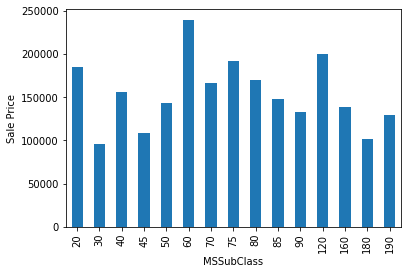

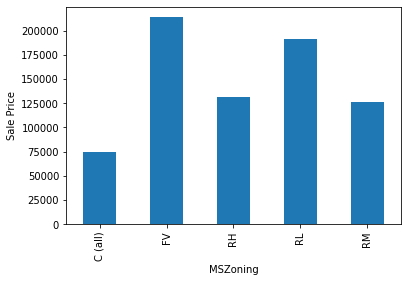

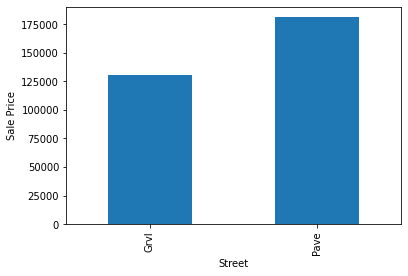

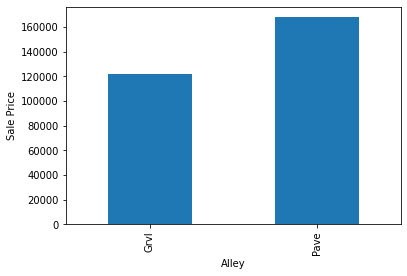

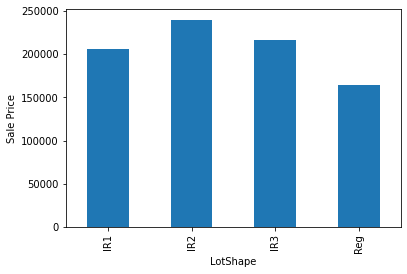

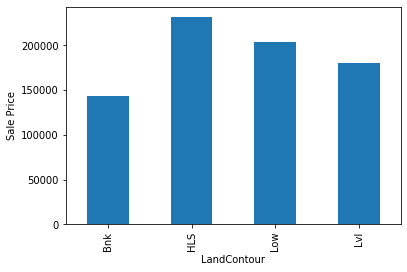

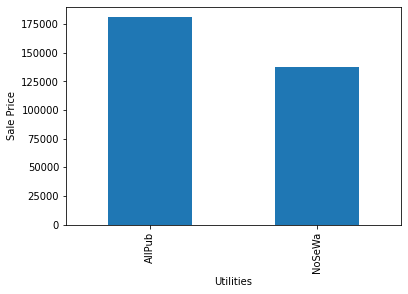

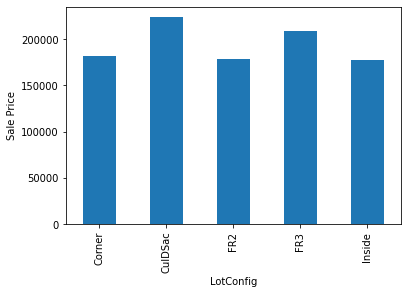

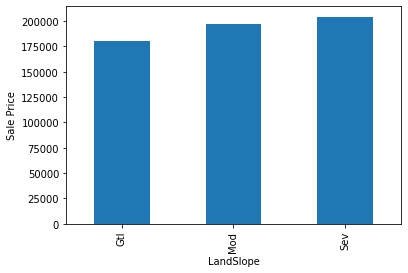

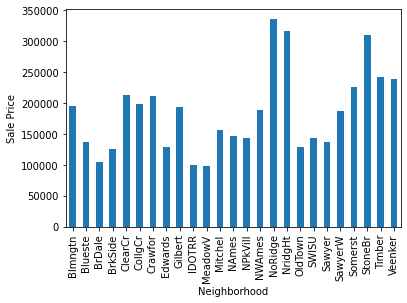

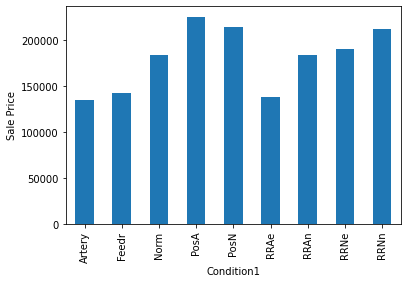

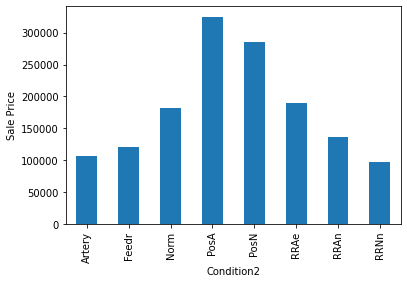

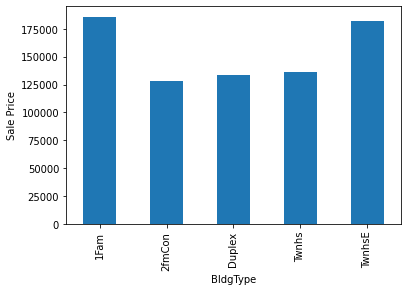

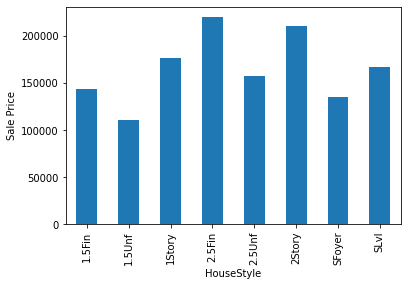

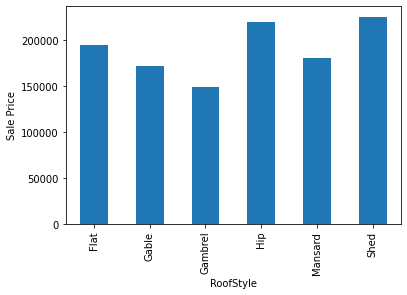

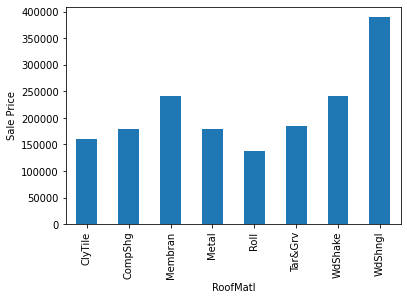

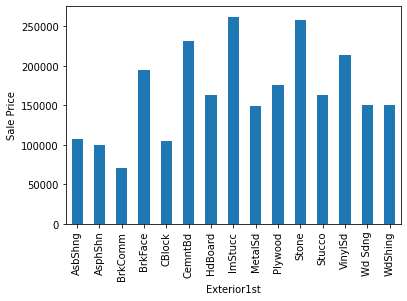

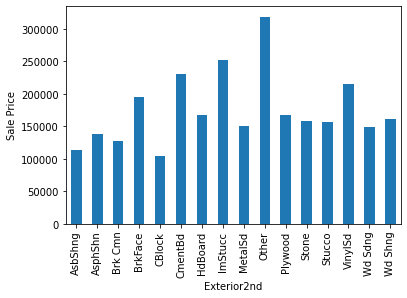

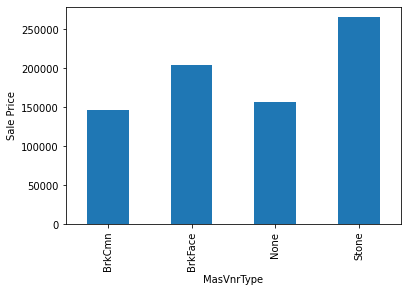

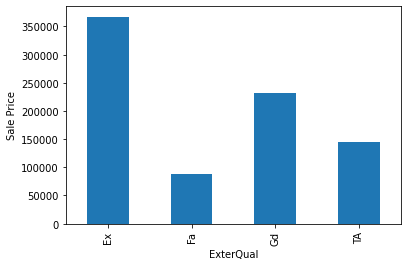

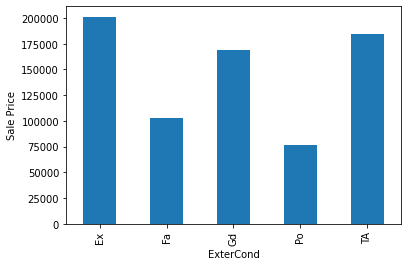

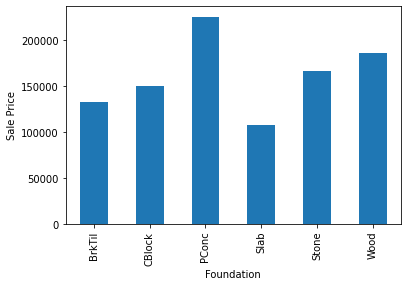

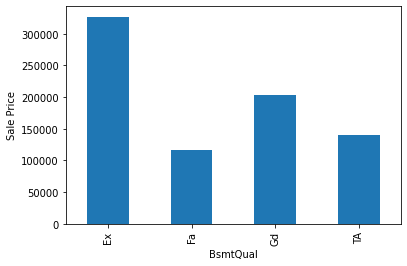

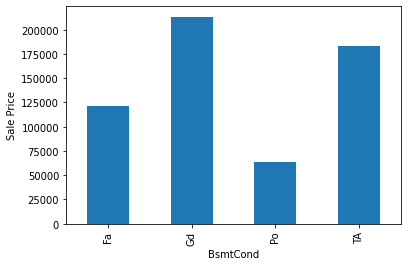

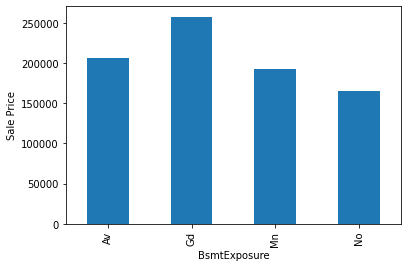

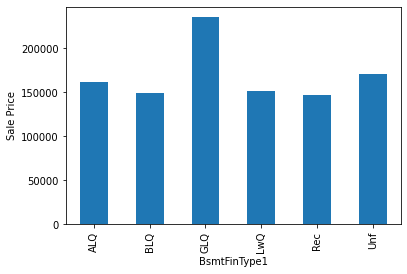

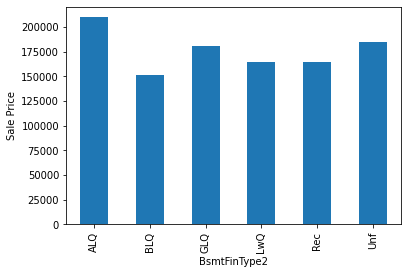

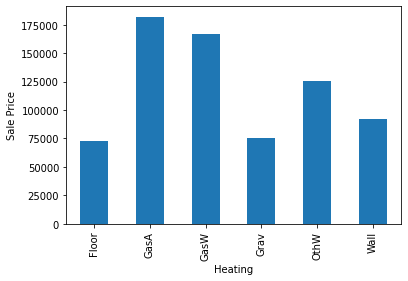

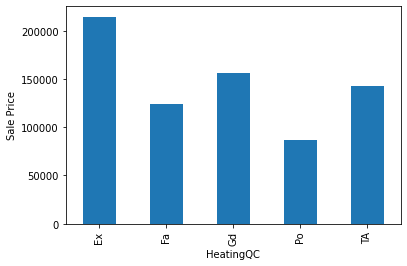

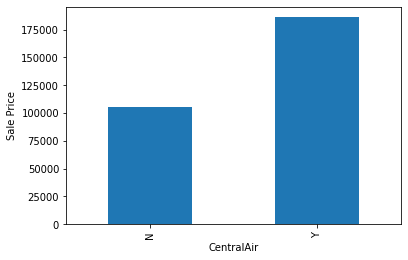

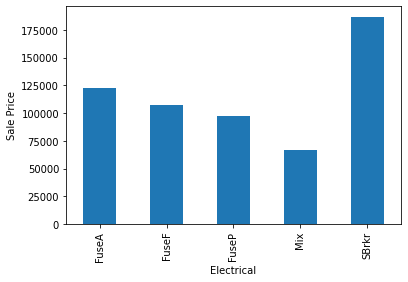

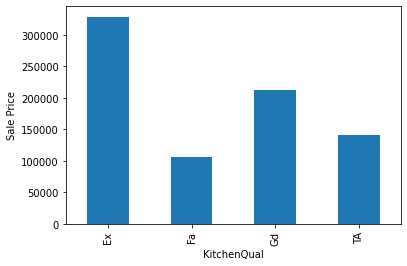

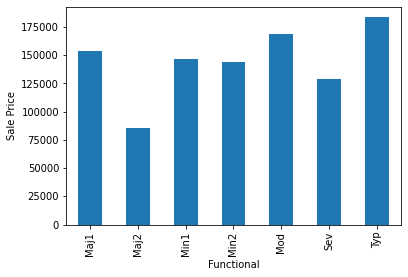

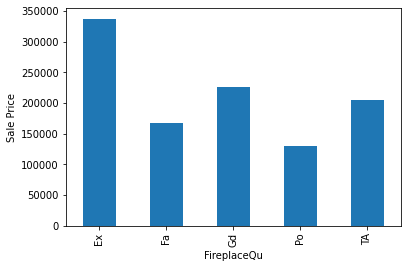

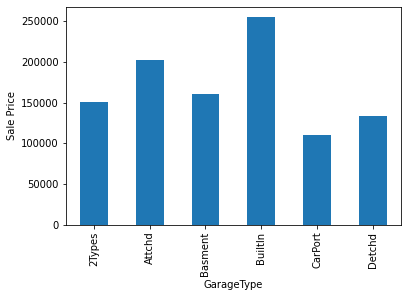

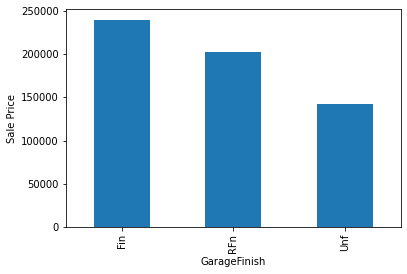

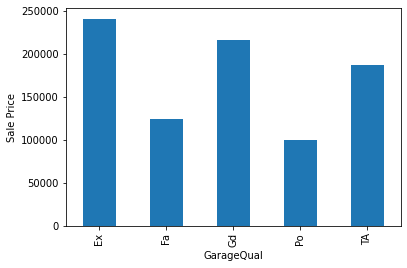

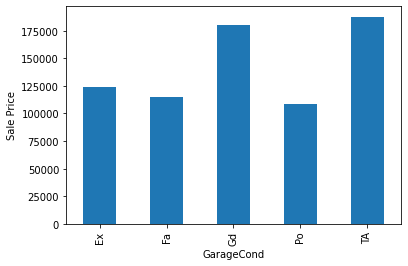

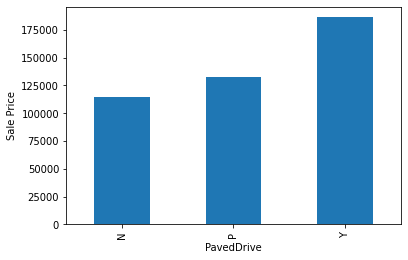

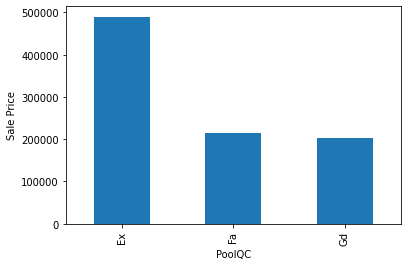

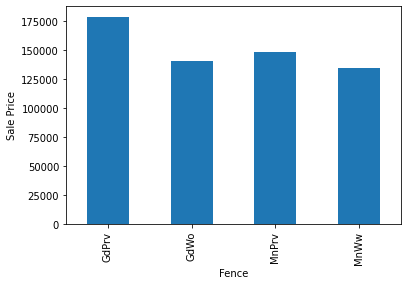

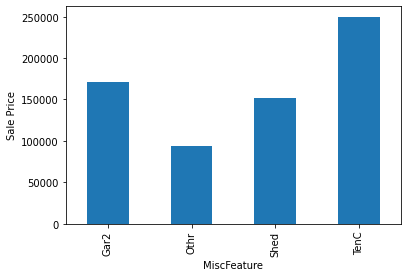

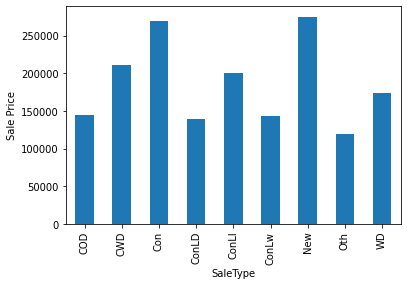

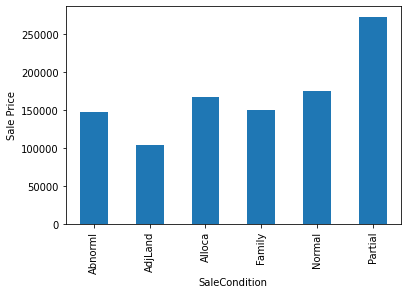

In [118]:
#Checking the correlation of categorical features with the sale price
for i in cat_features:
    foo = train_data.copy()
    foo.groupby(i)['SalePrice'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Sale Price')
    plt.show()